In [ ]:
import subprocess
import sys
import os

libraries = ["ultralytics"]

for lib in libraries:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", lib])


In [ ]:
CLUSTER = True
if not CLUSTER:
    HOME = "/Users/rubenhayrapetyan/Downloads/Code/FRC/machine-learning/2025-Coral_Detection_Training"
else:
    HOME = "/home/rhayrapetyan/2025-Coral_Detection_Training"
    os.makedirs(f"{HOME}/robot_detection/runs/train", exist_ok=True)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)
if CLUSTER:
    os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
    results = model.train(
        data=f"{HOME}/FRC 2024.v4i.yolov12/data.yaml",
        epochs=100,
        imgsz=640,
        batch=16,
        name="robot-detection-model-v1",
        device=[0,1],
        workers=2,
        project=f"{HOME}/robot_detection/runs/train"
    )    
else:
    results = model.train(
        data=f"{HOME}/FRC 2024.v4i.yolov12/data.yaml",
        epochs=100,
        imgsz=640,
        batch=16,
        name="robot-detection-model-v1",
        workers=8,
        project=f"{HOME}/robot_detection/runs/train"
    )

metrics = model.val(split="test")

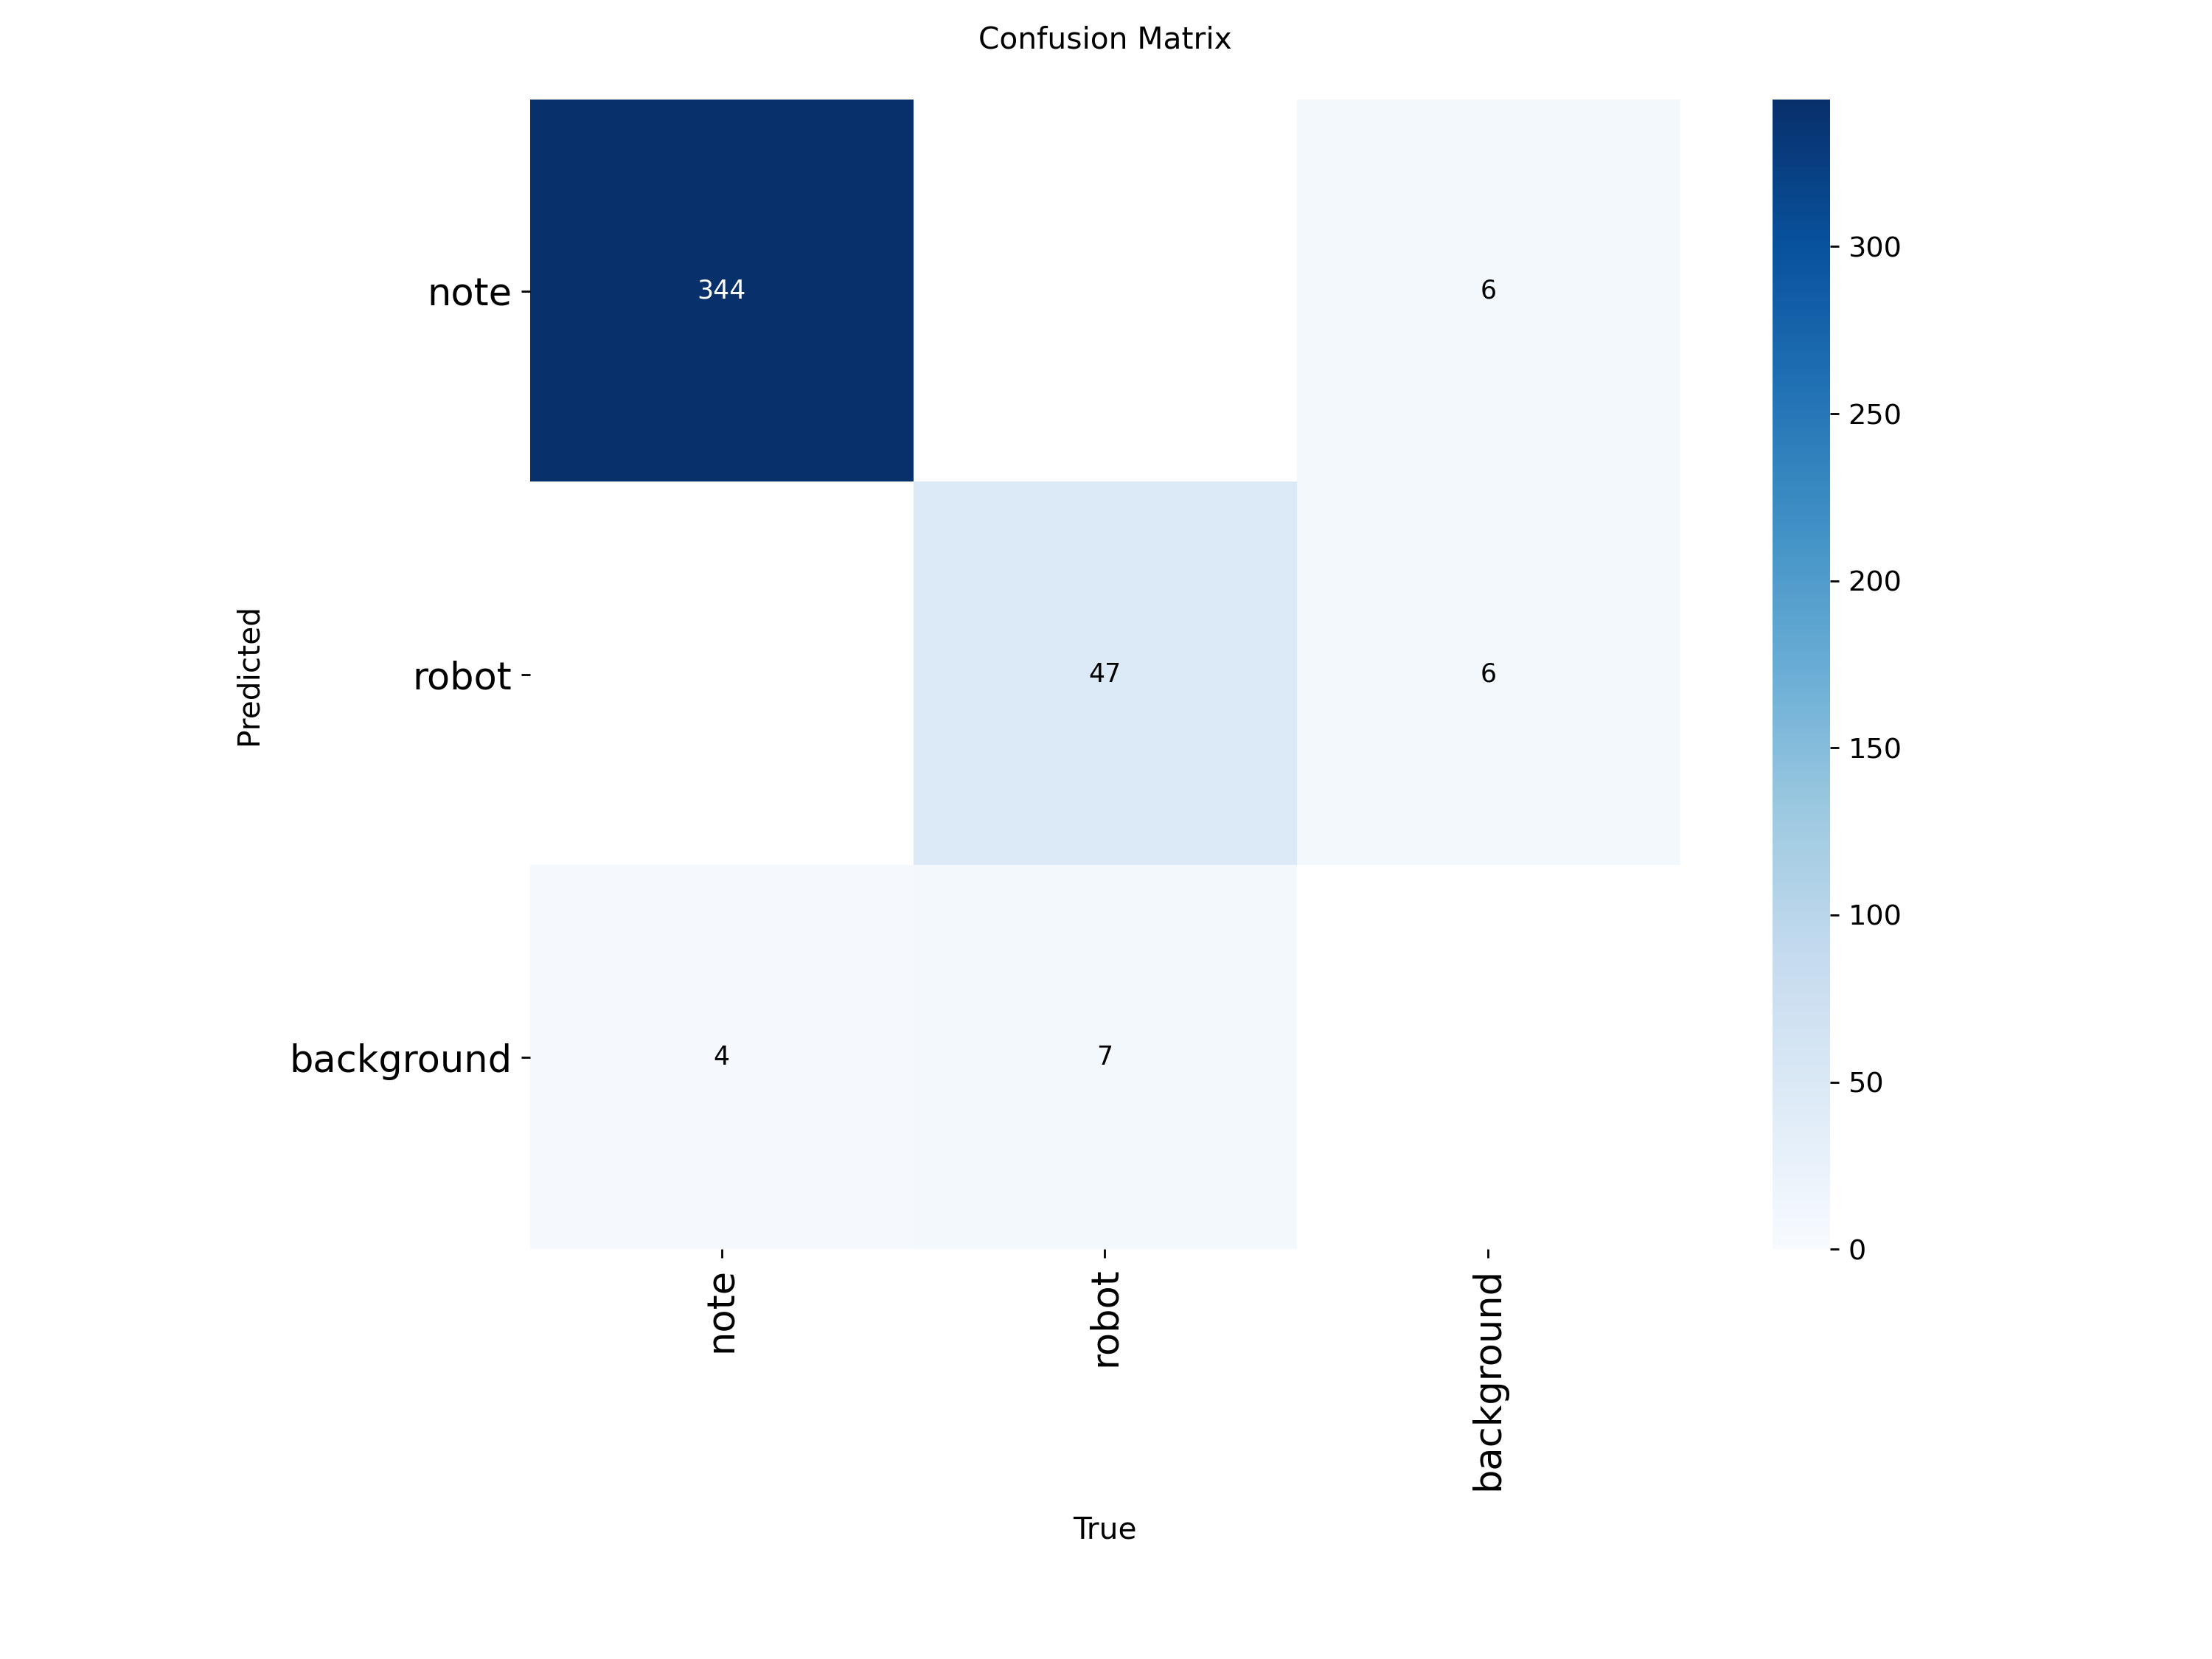

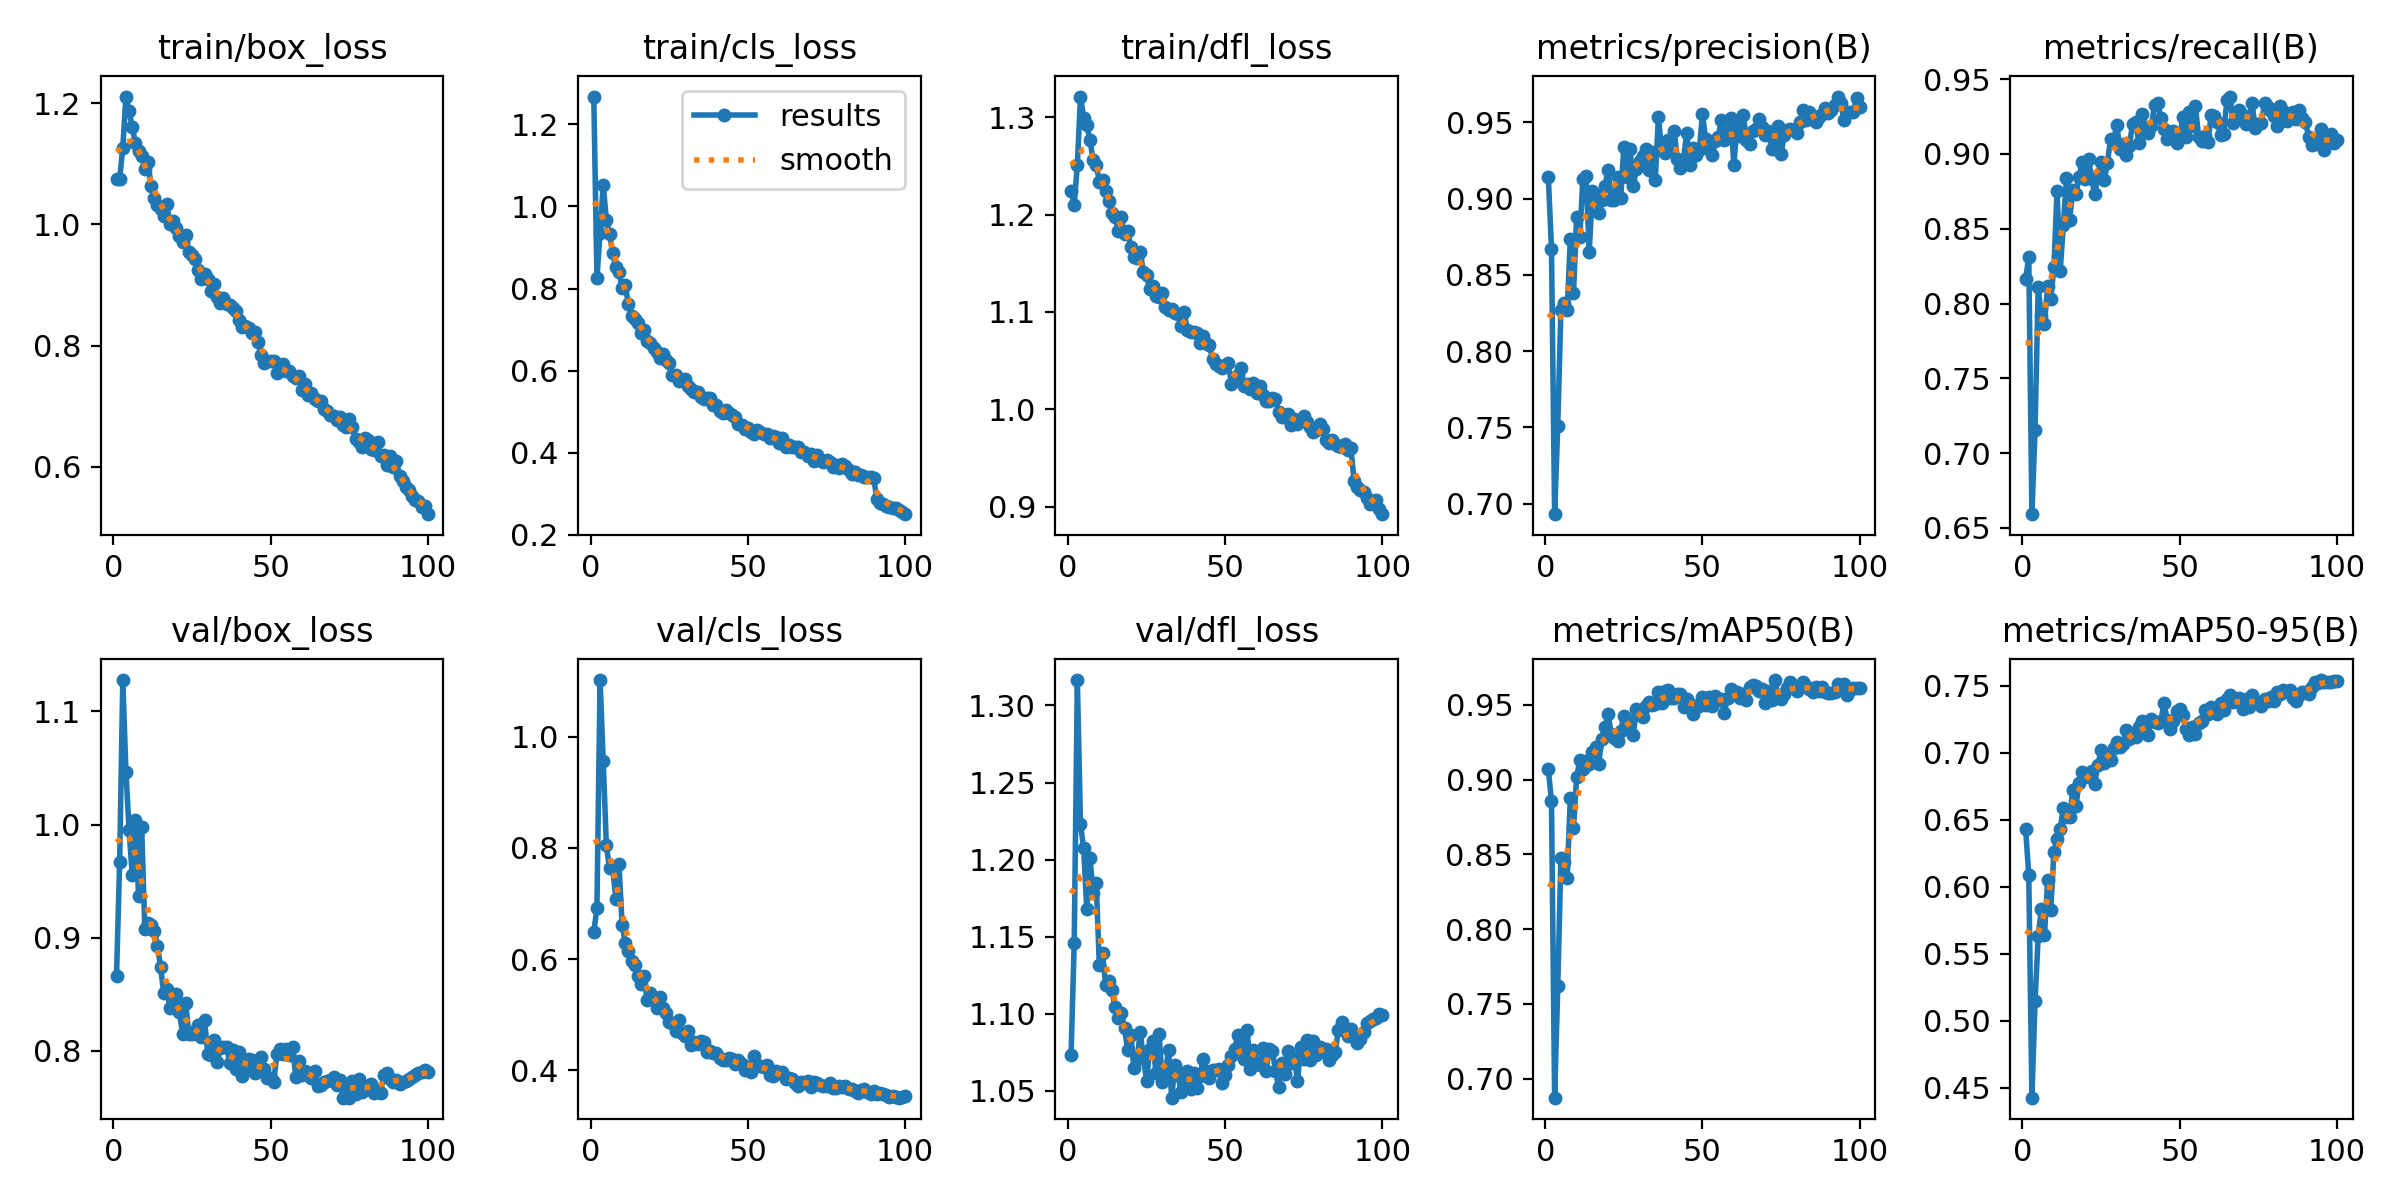

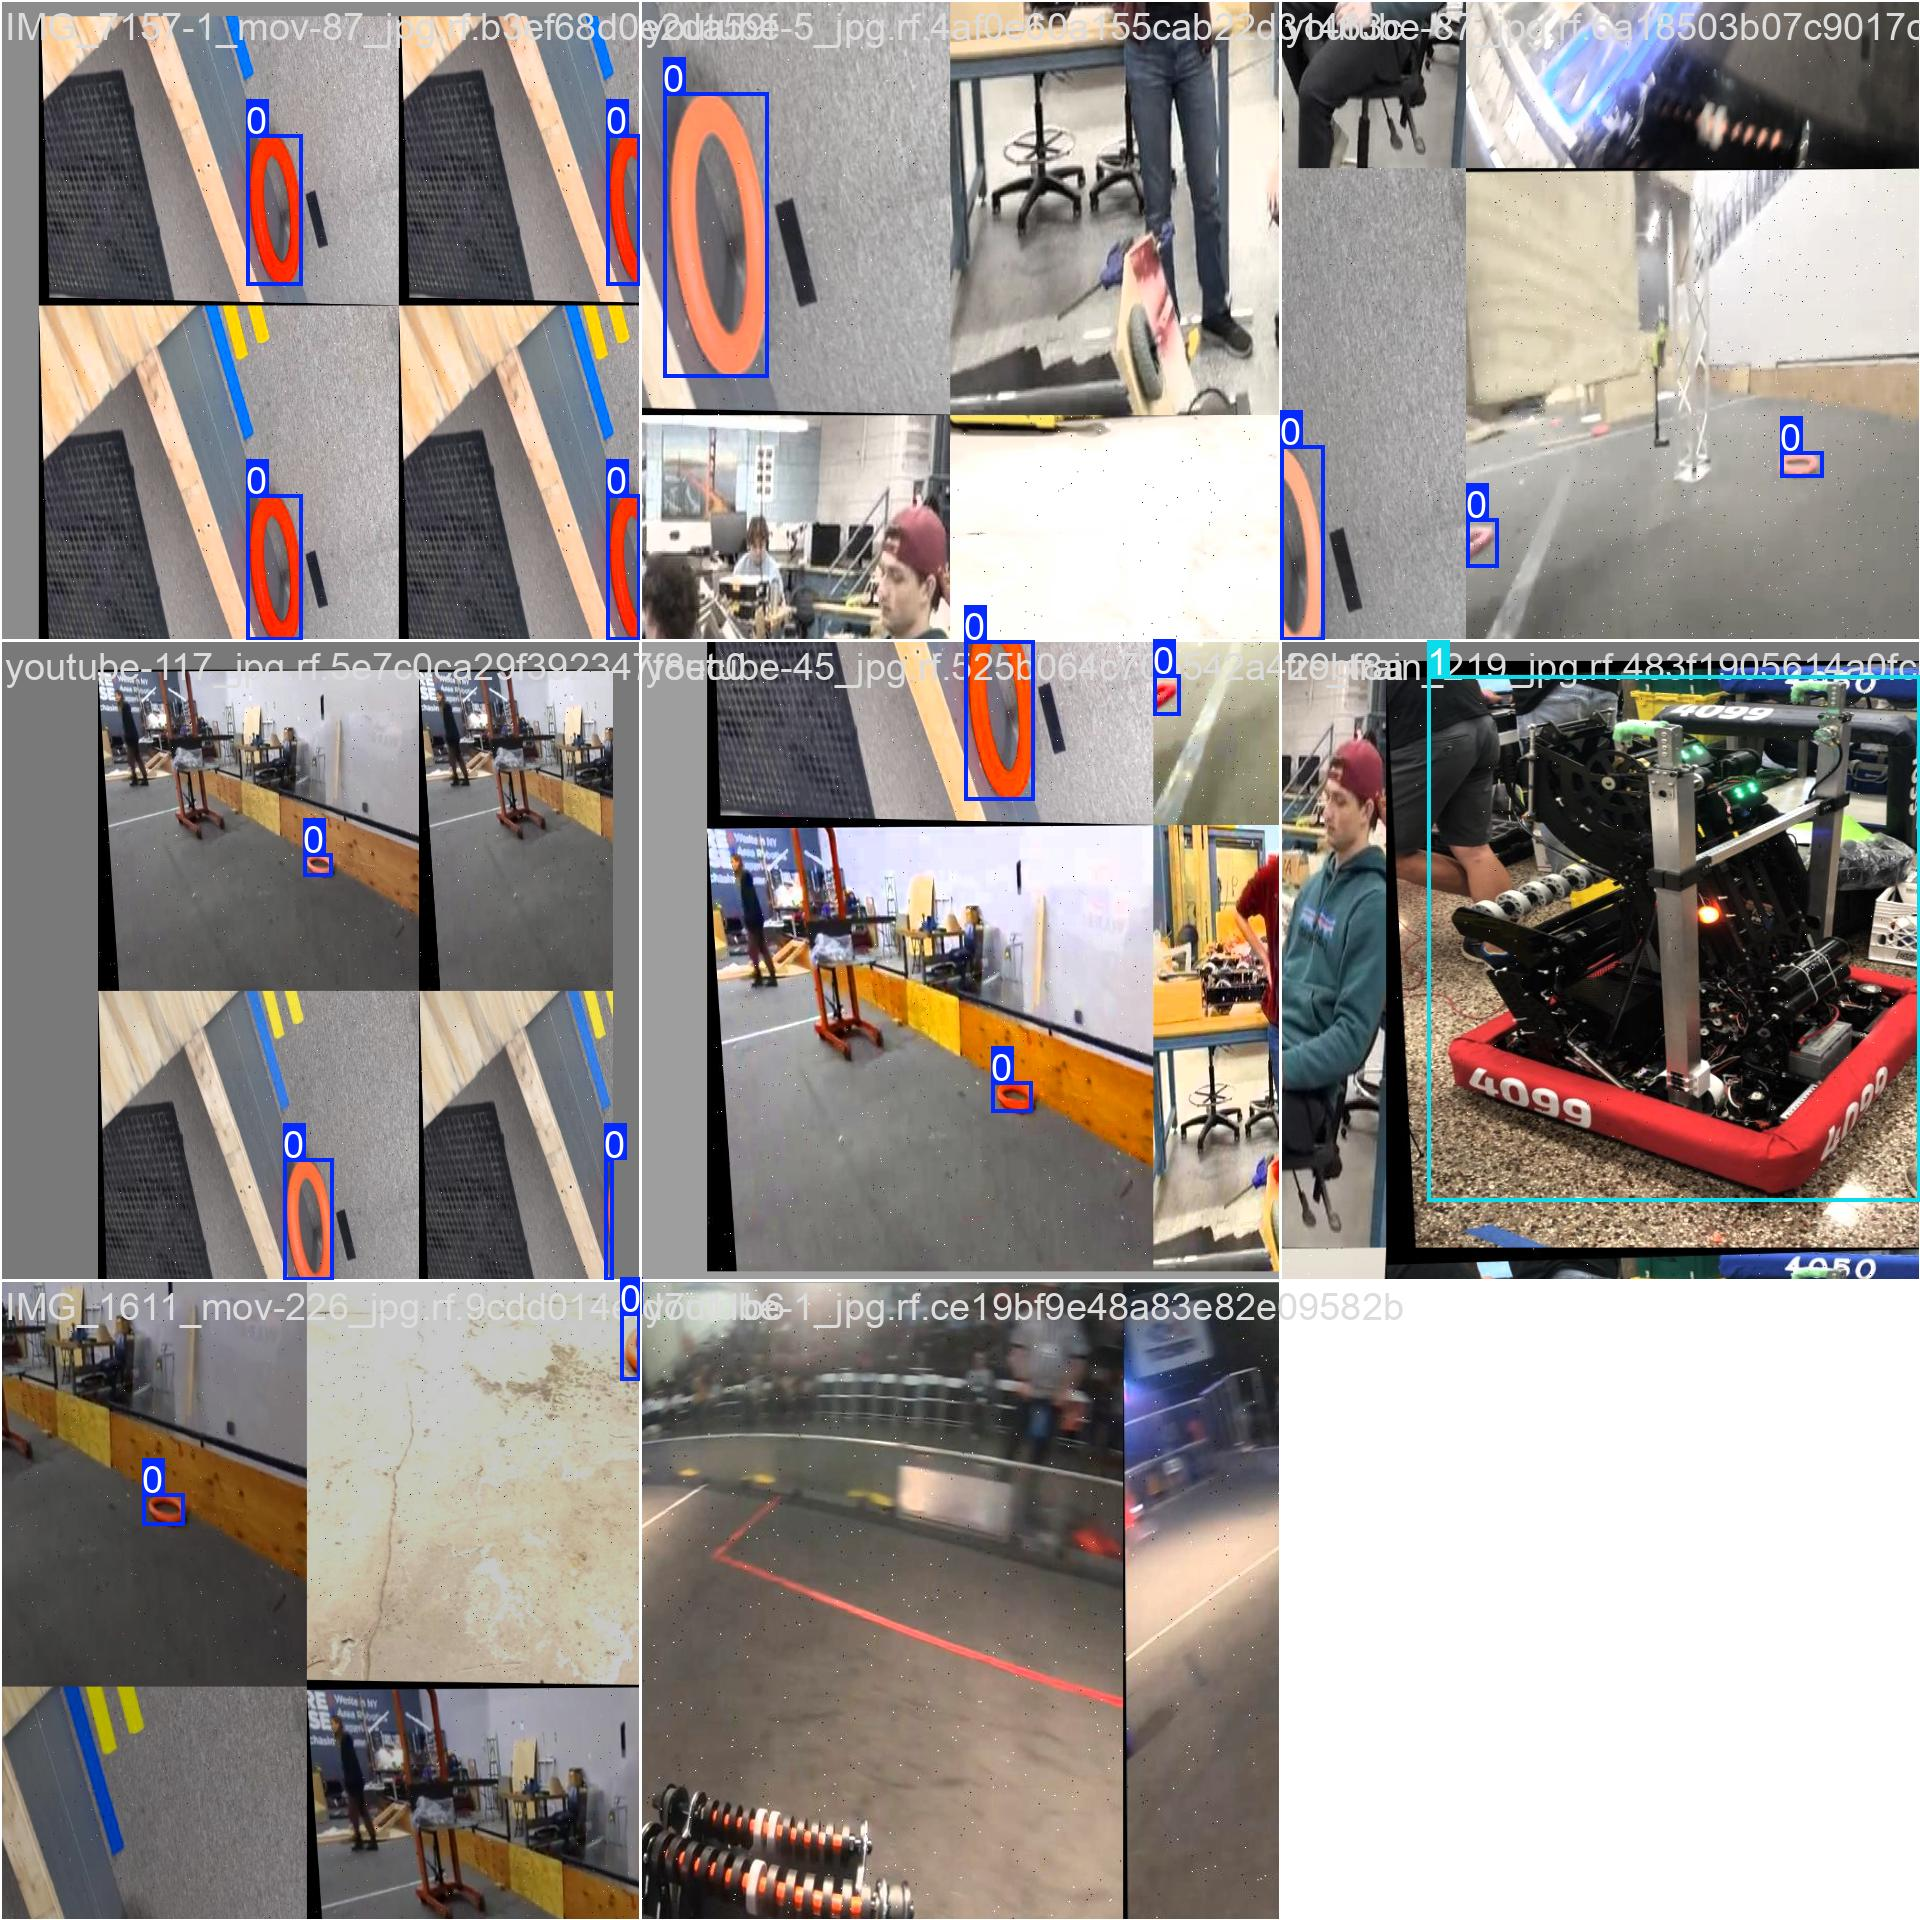

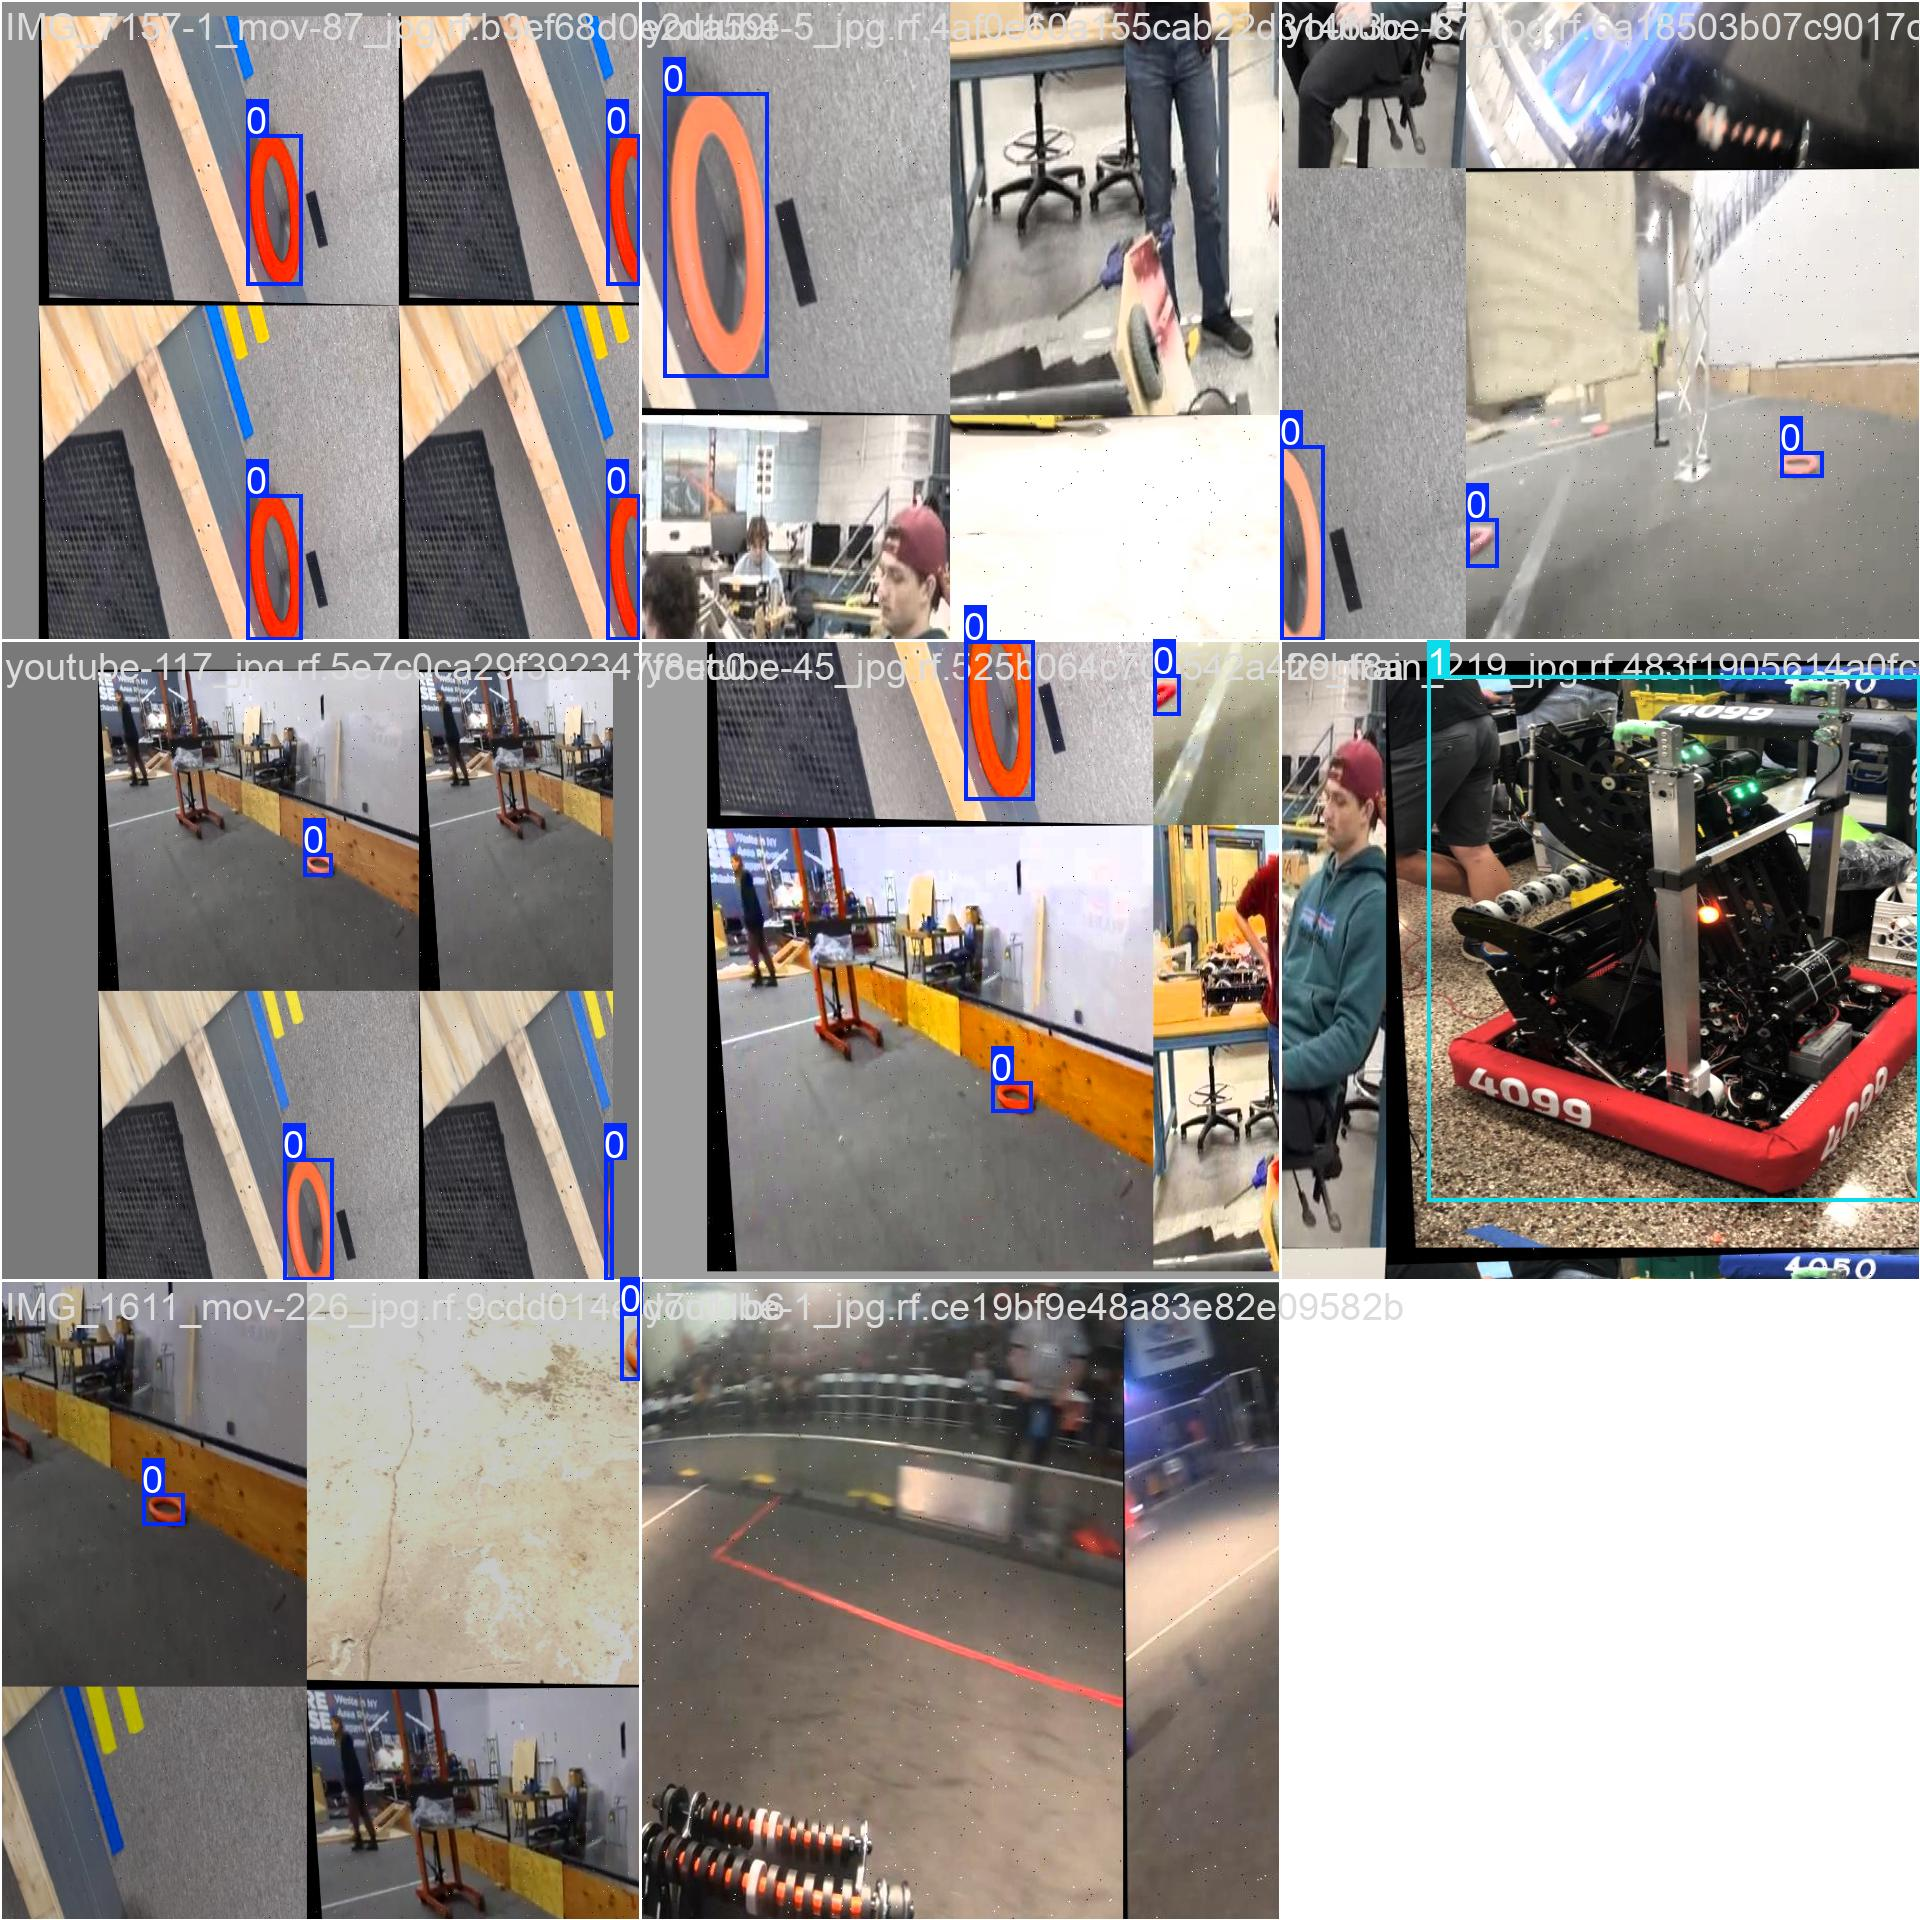

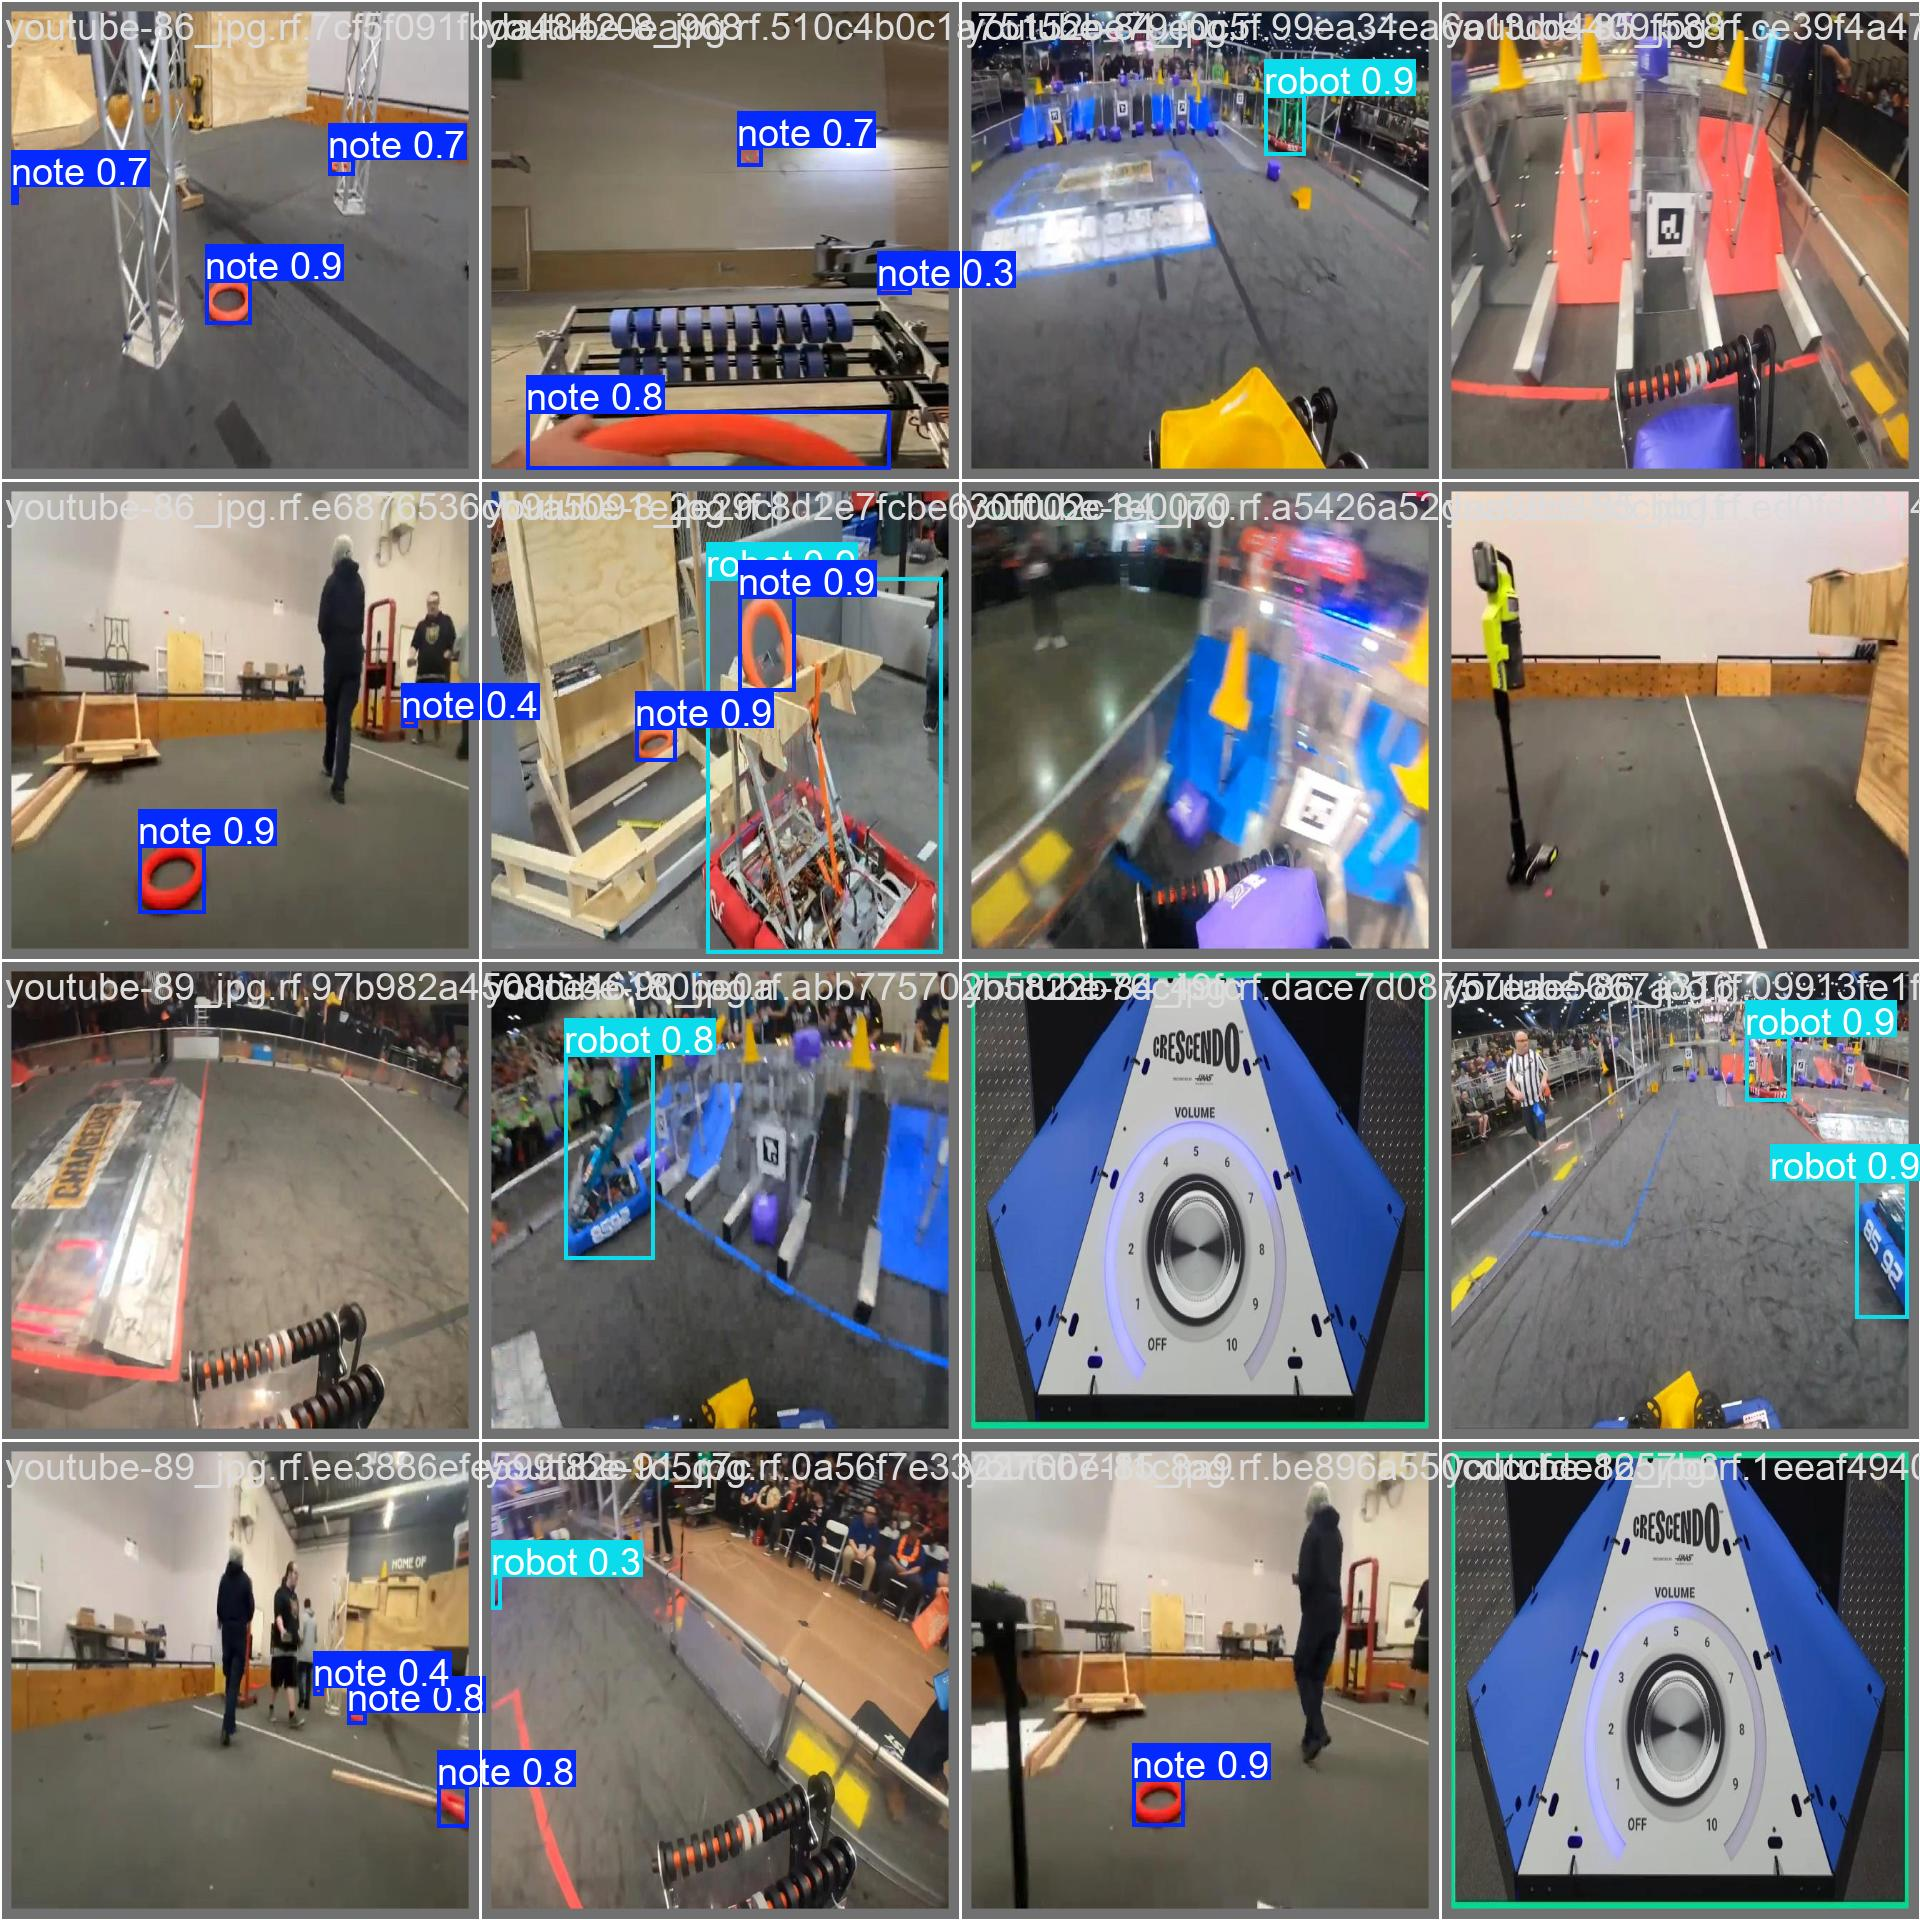

In [12]:
from IPython.display import Image, display
import os
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v14/confusion_matrix.png', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v14/results.png', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v14/train_batch0.jpg', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v14/train_batch0.jpg', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v14/val_batch0_pred.jpg', width=600))


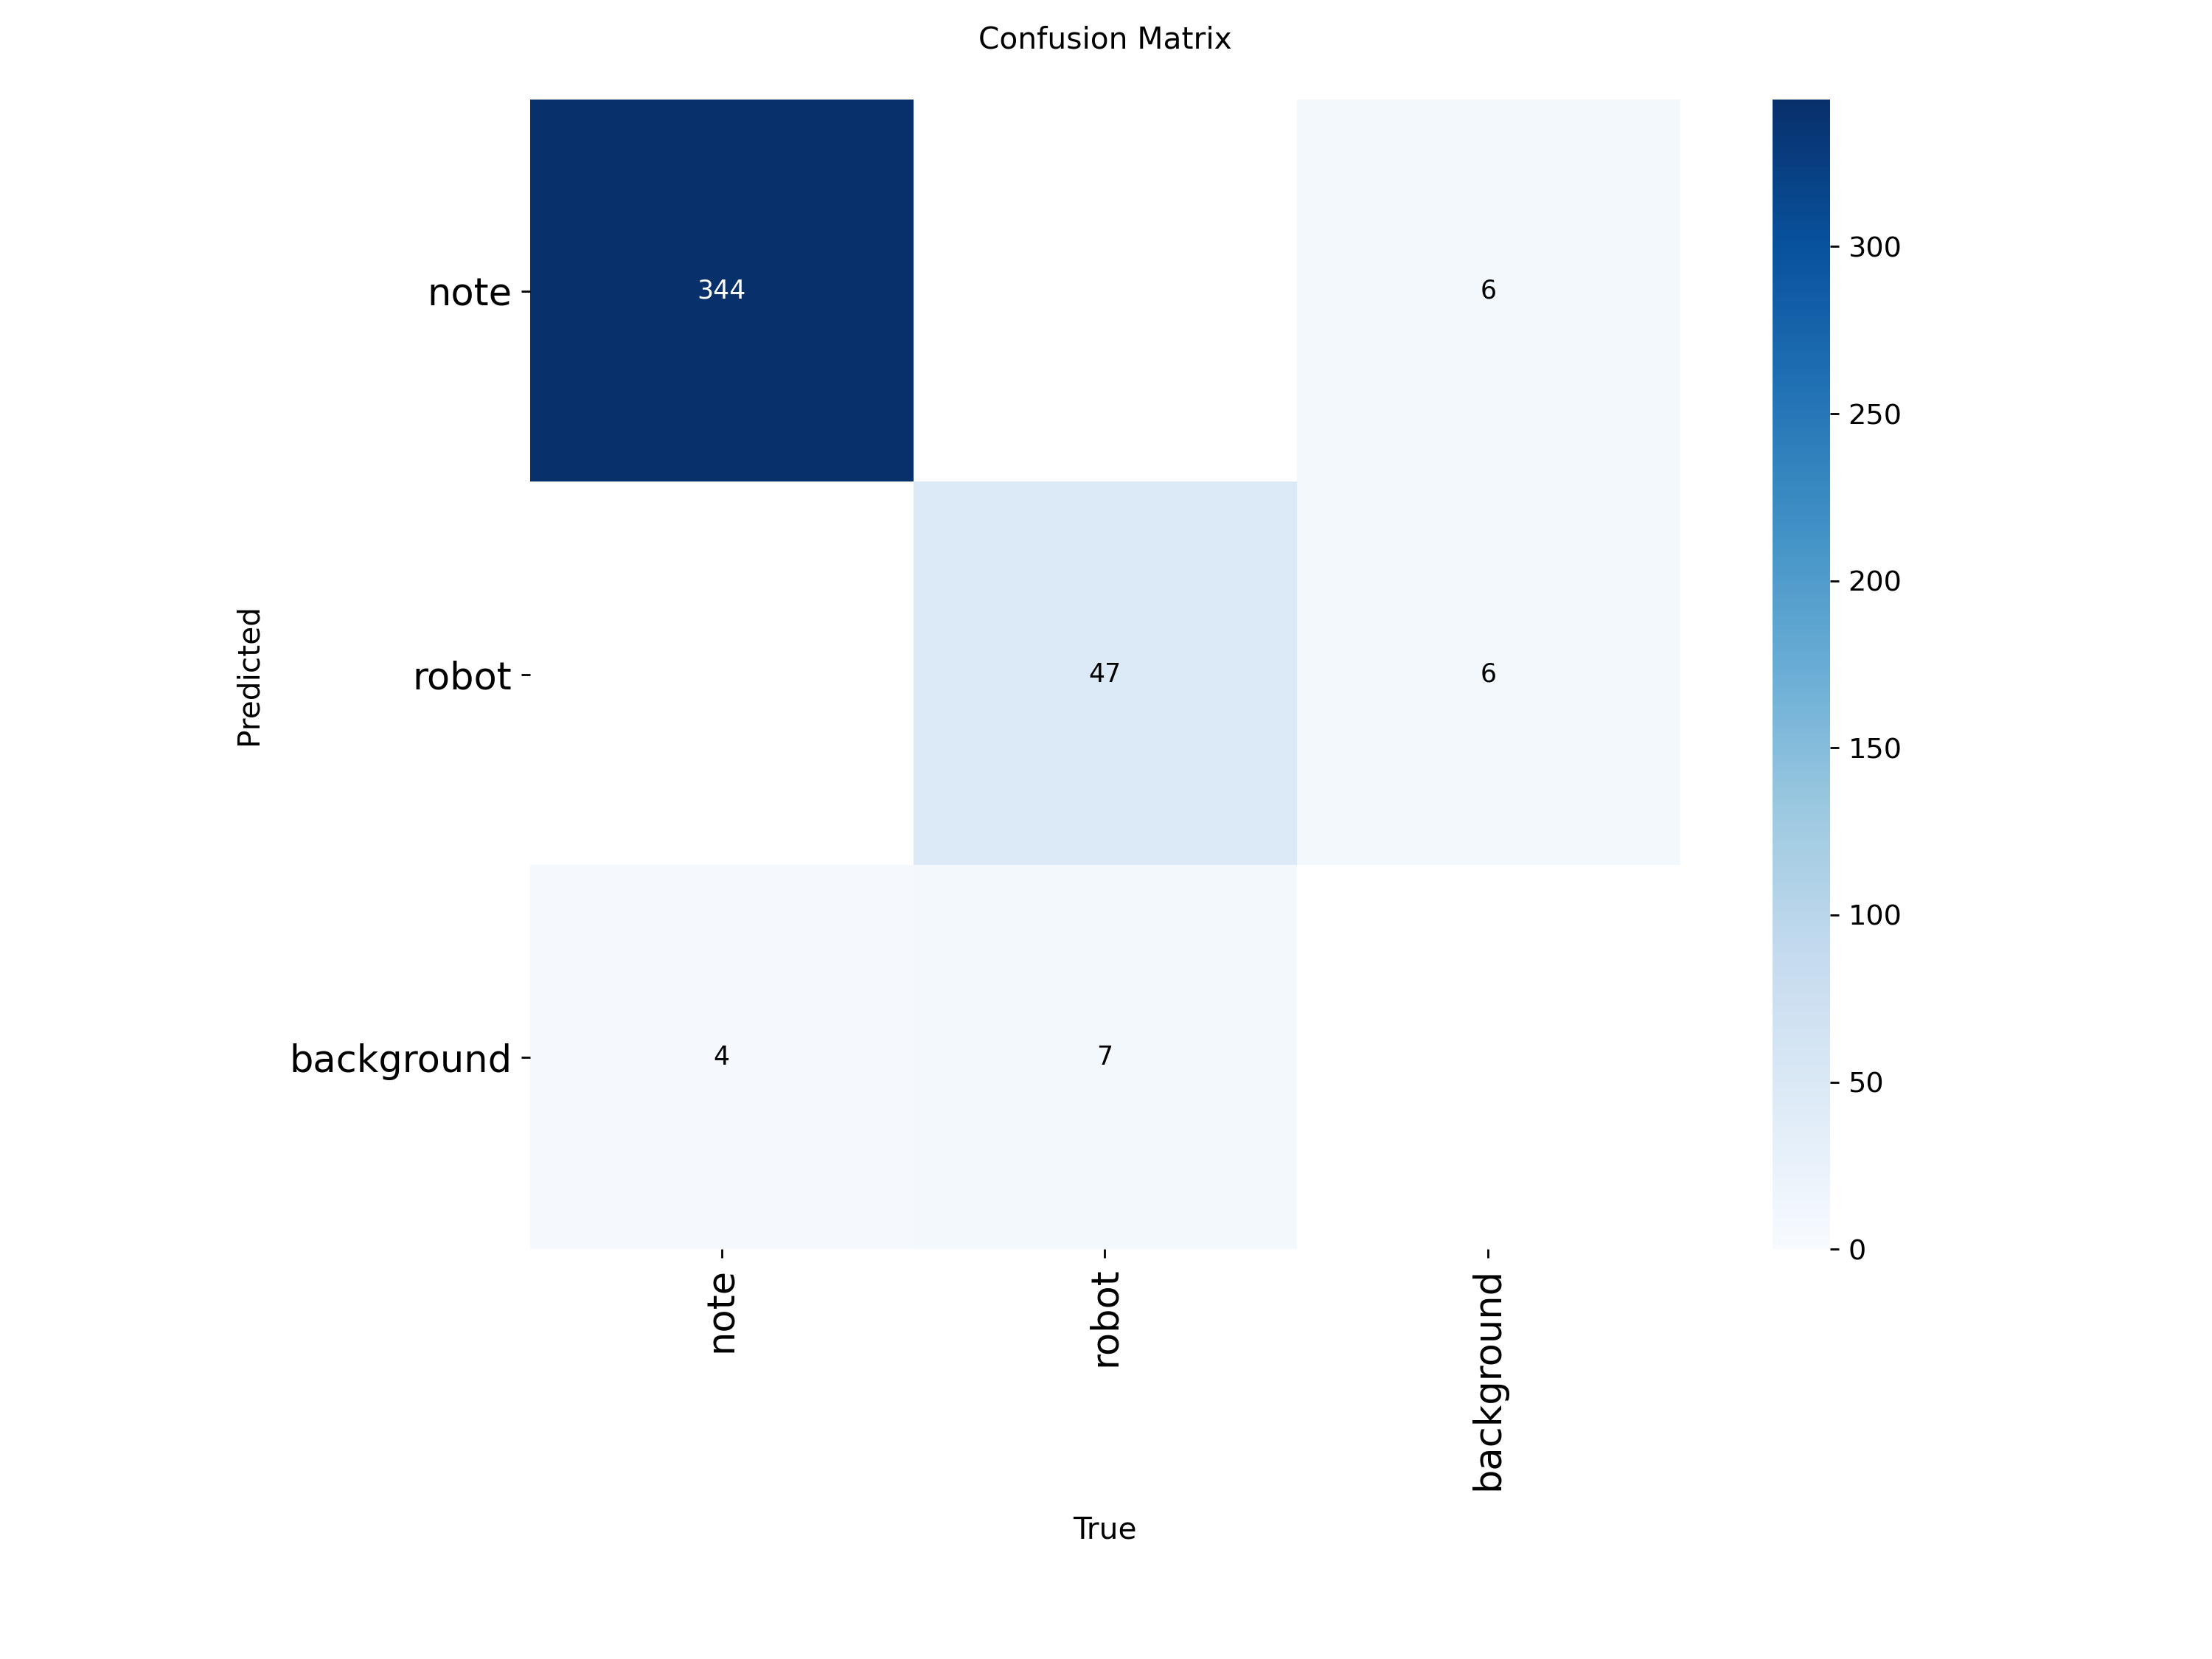

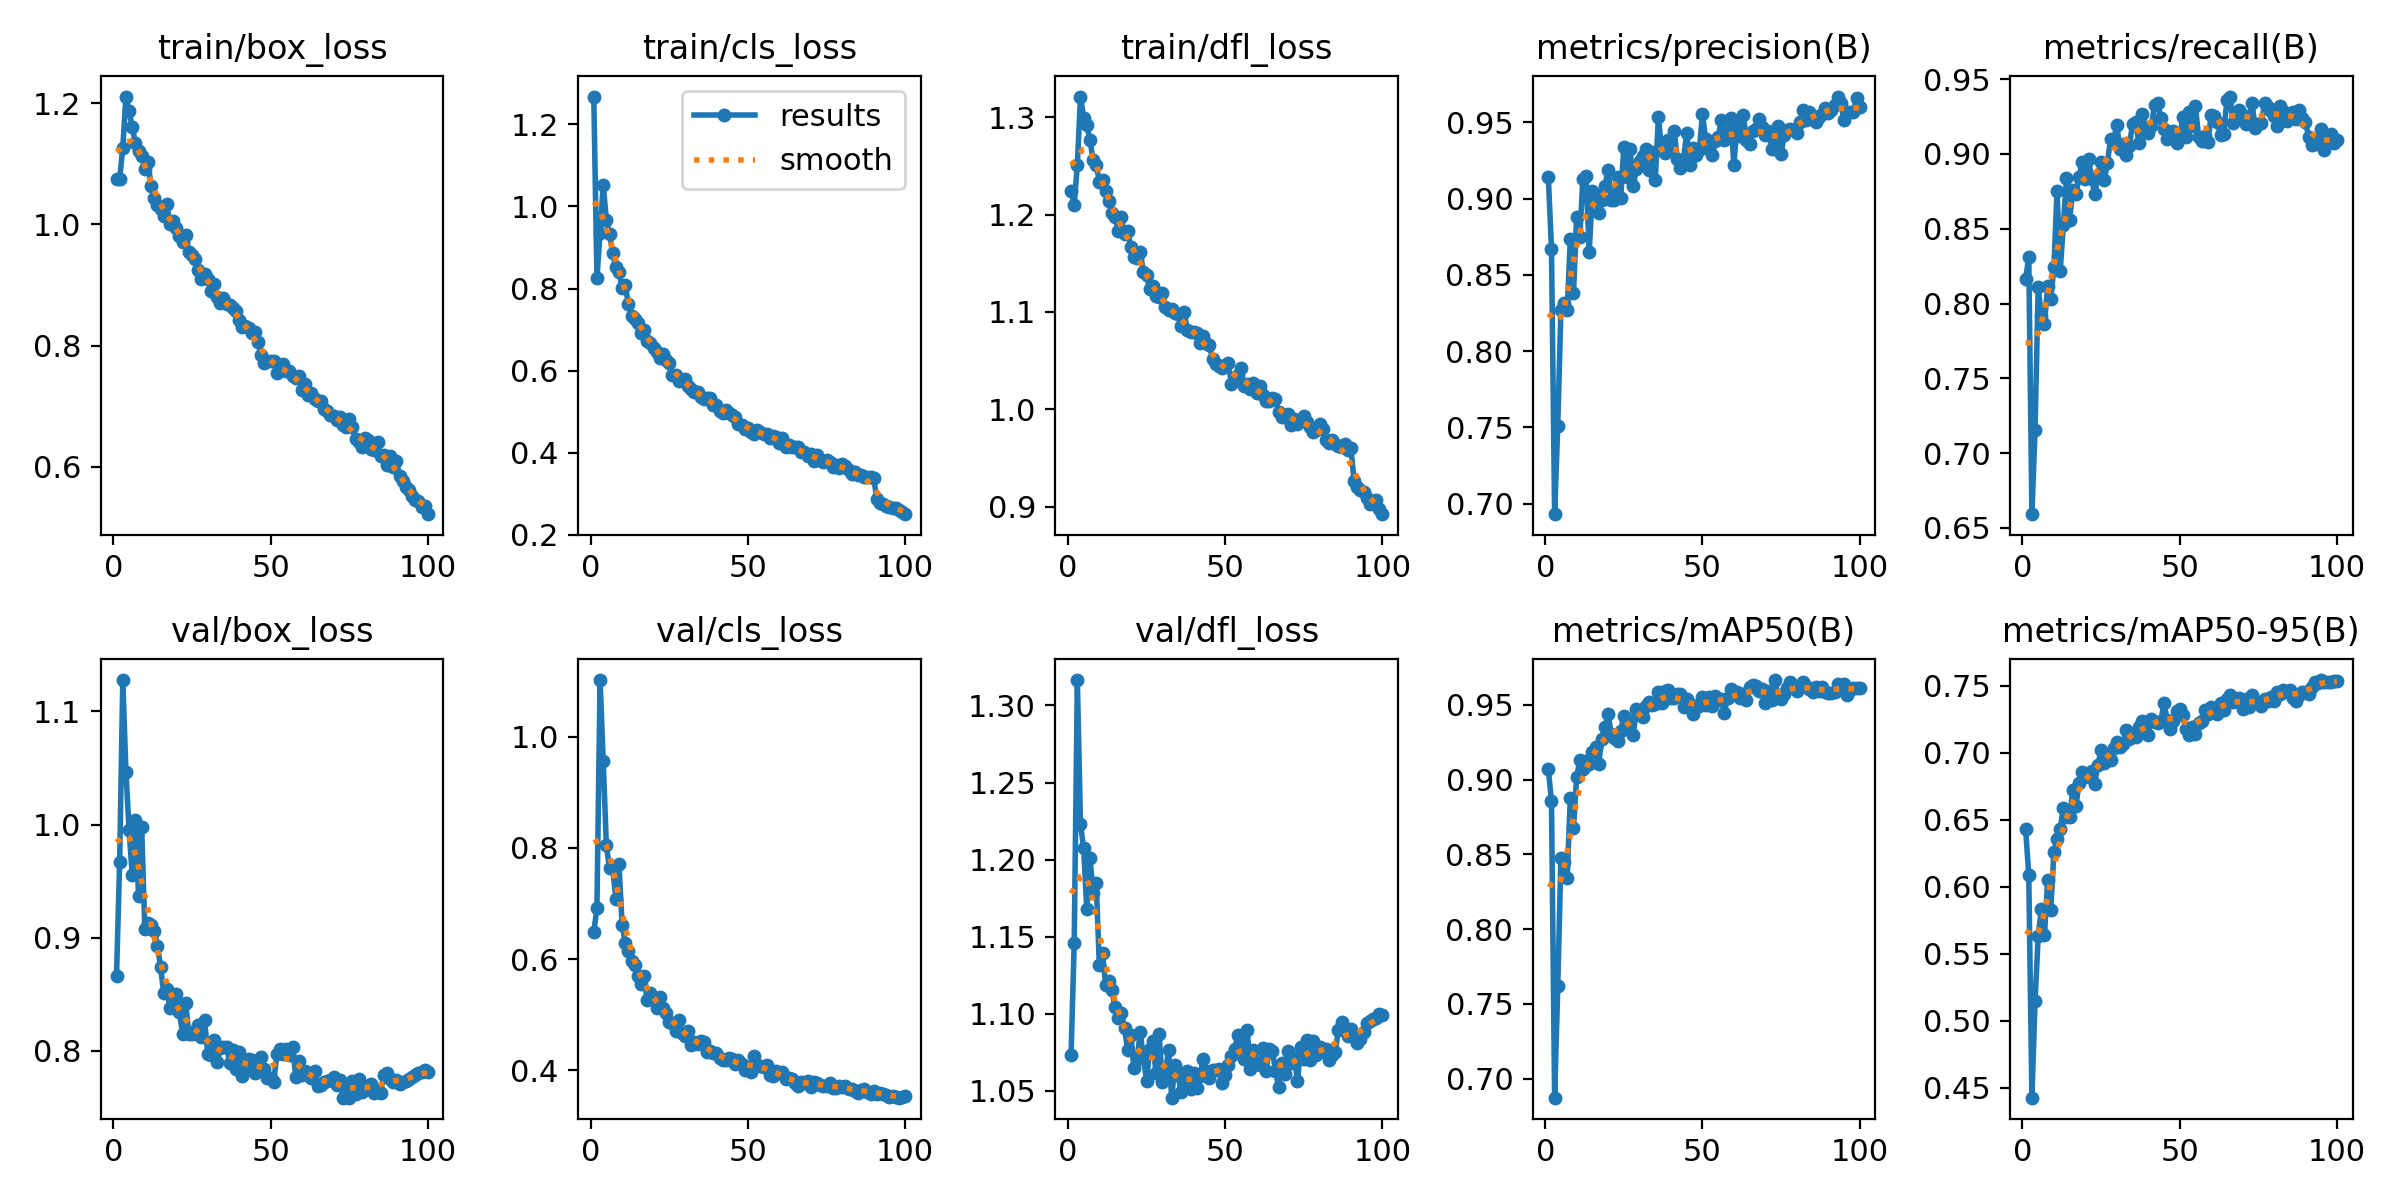

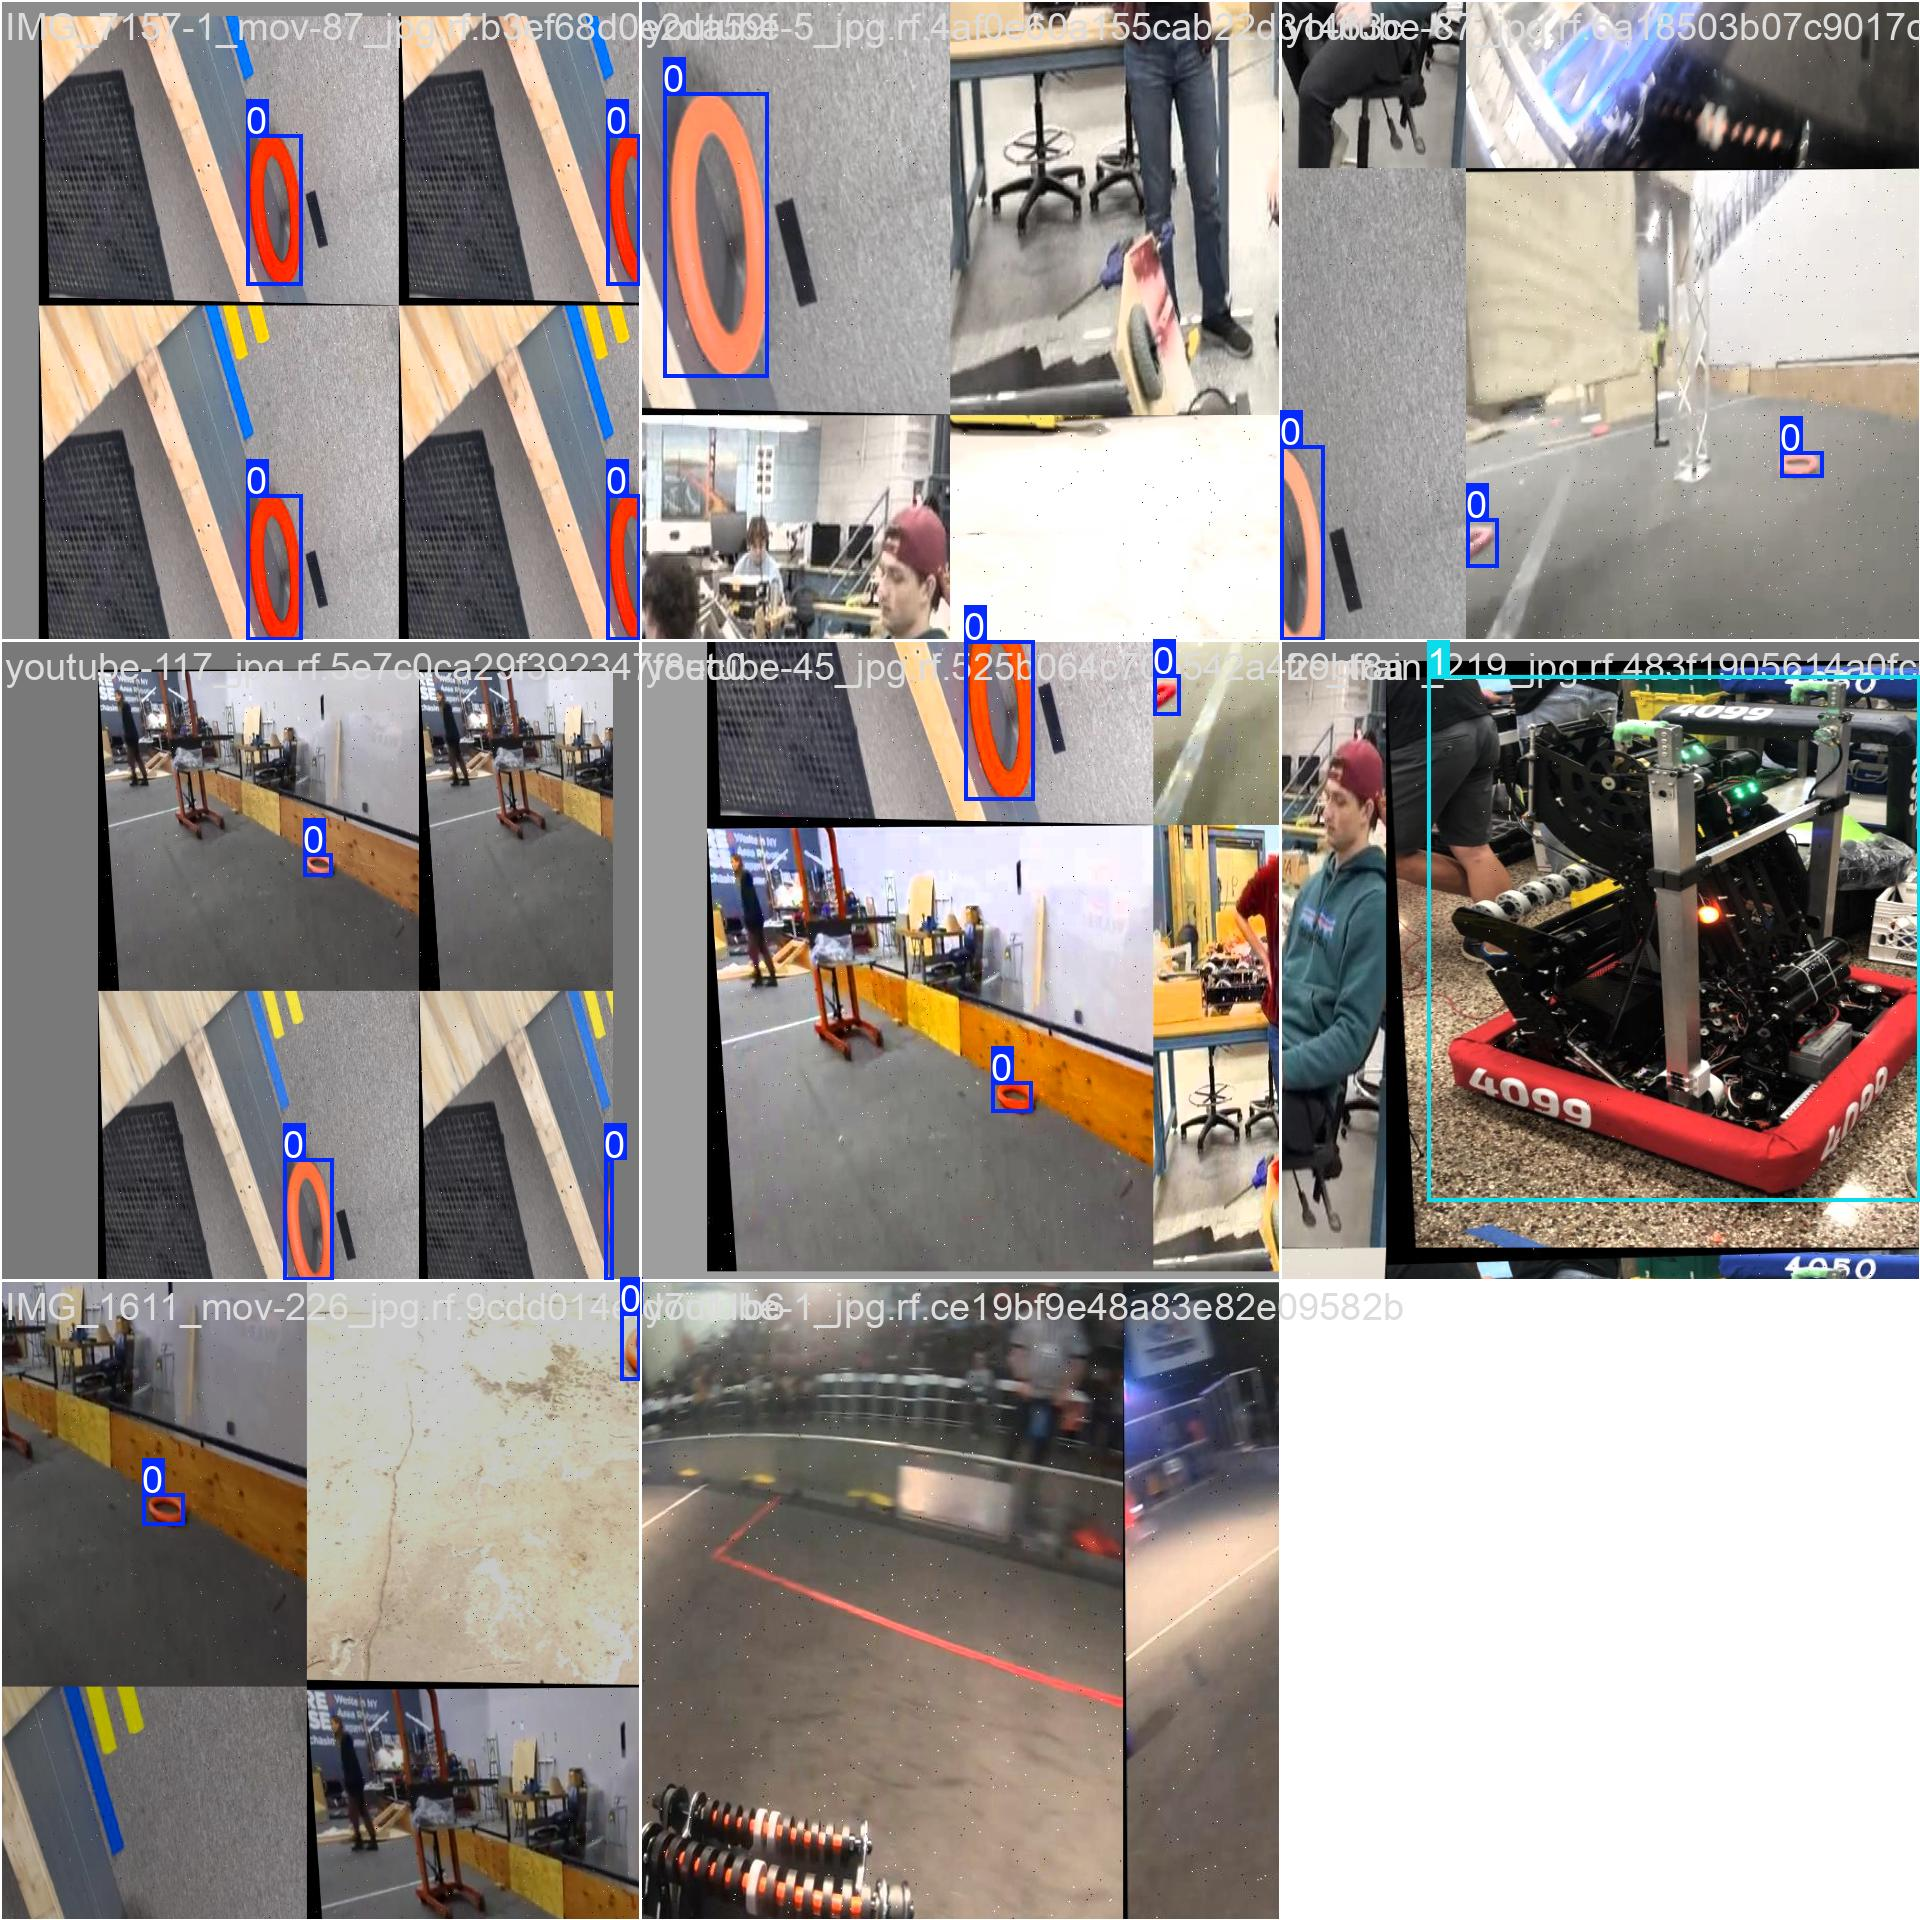

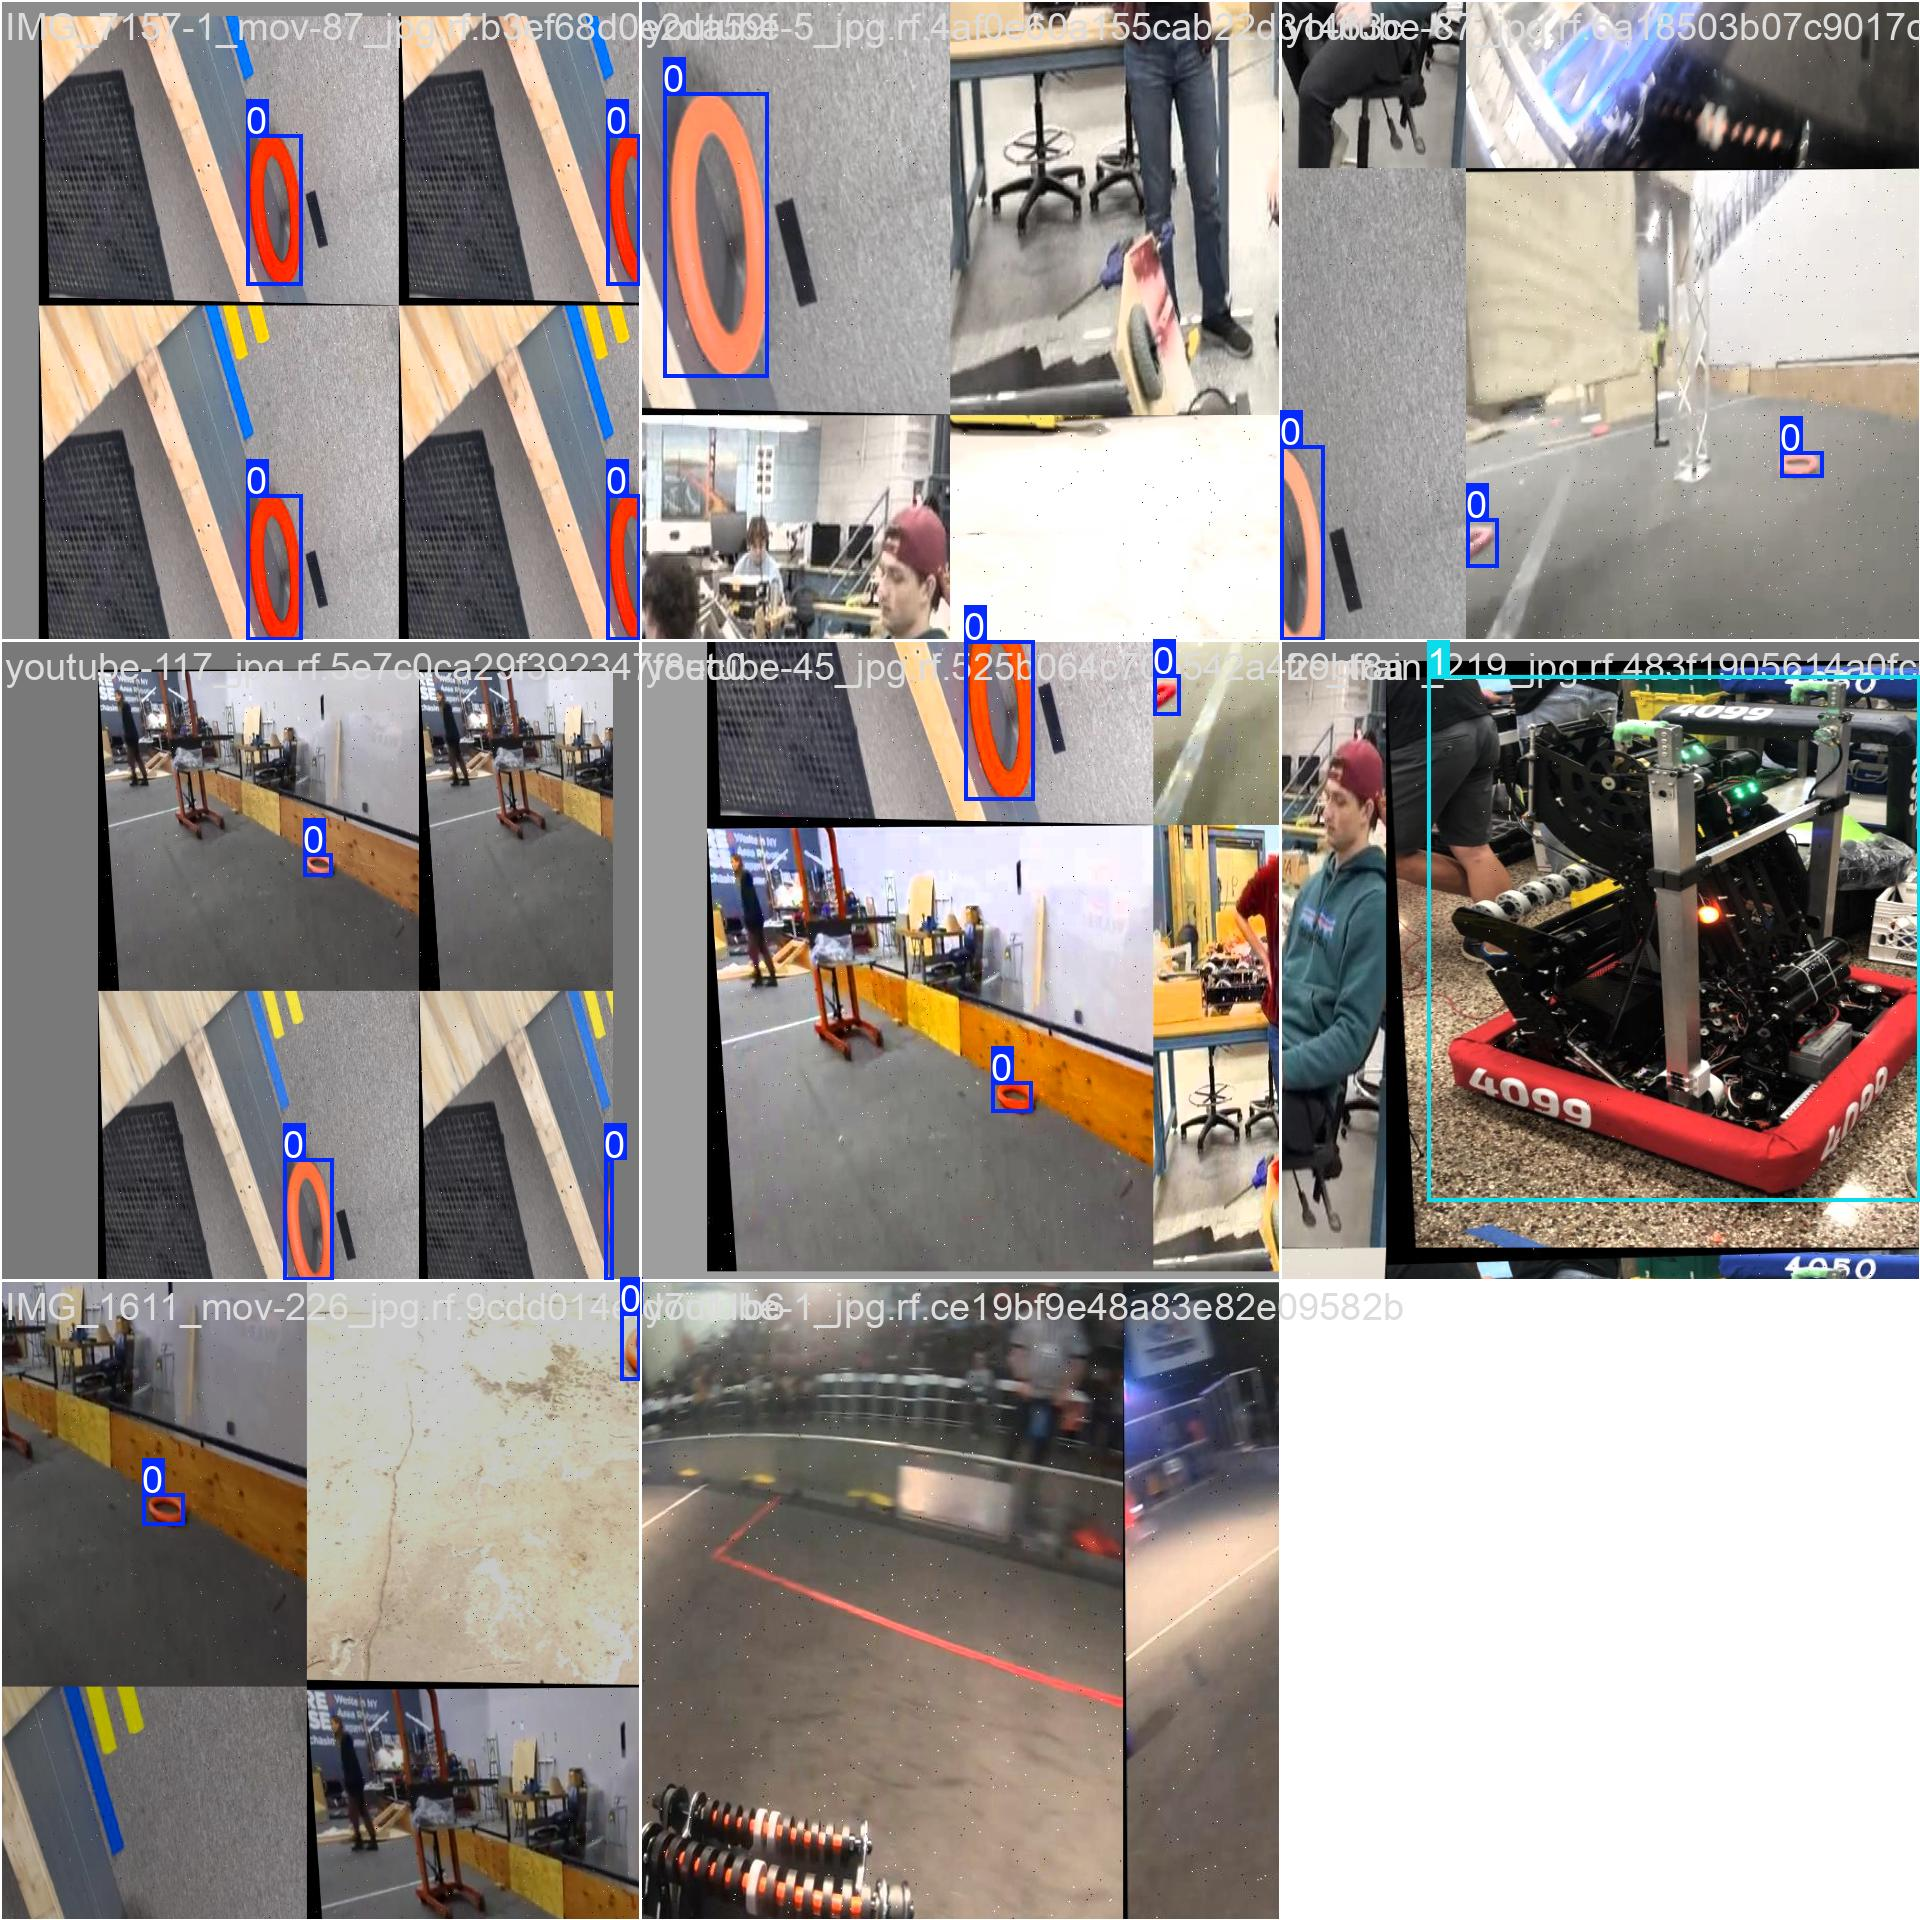

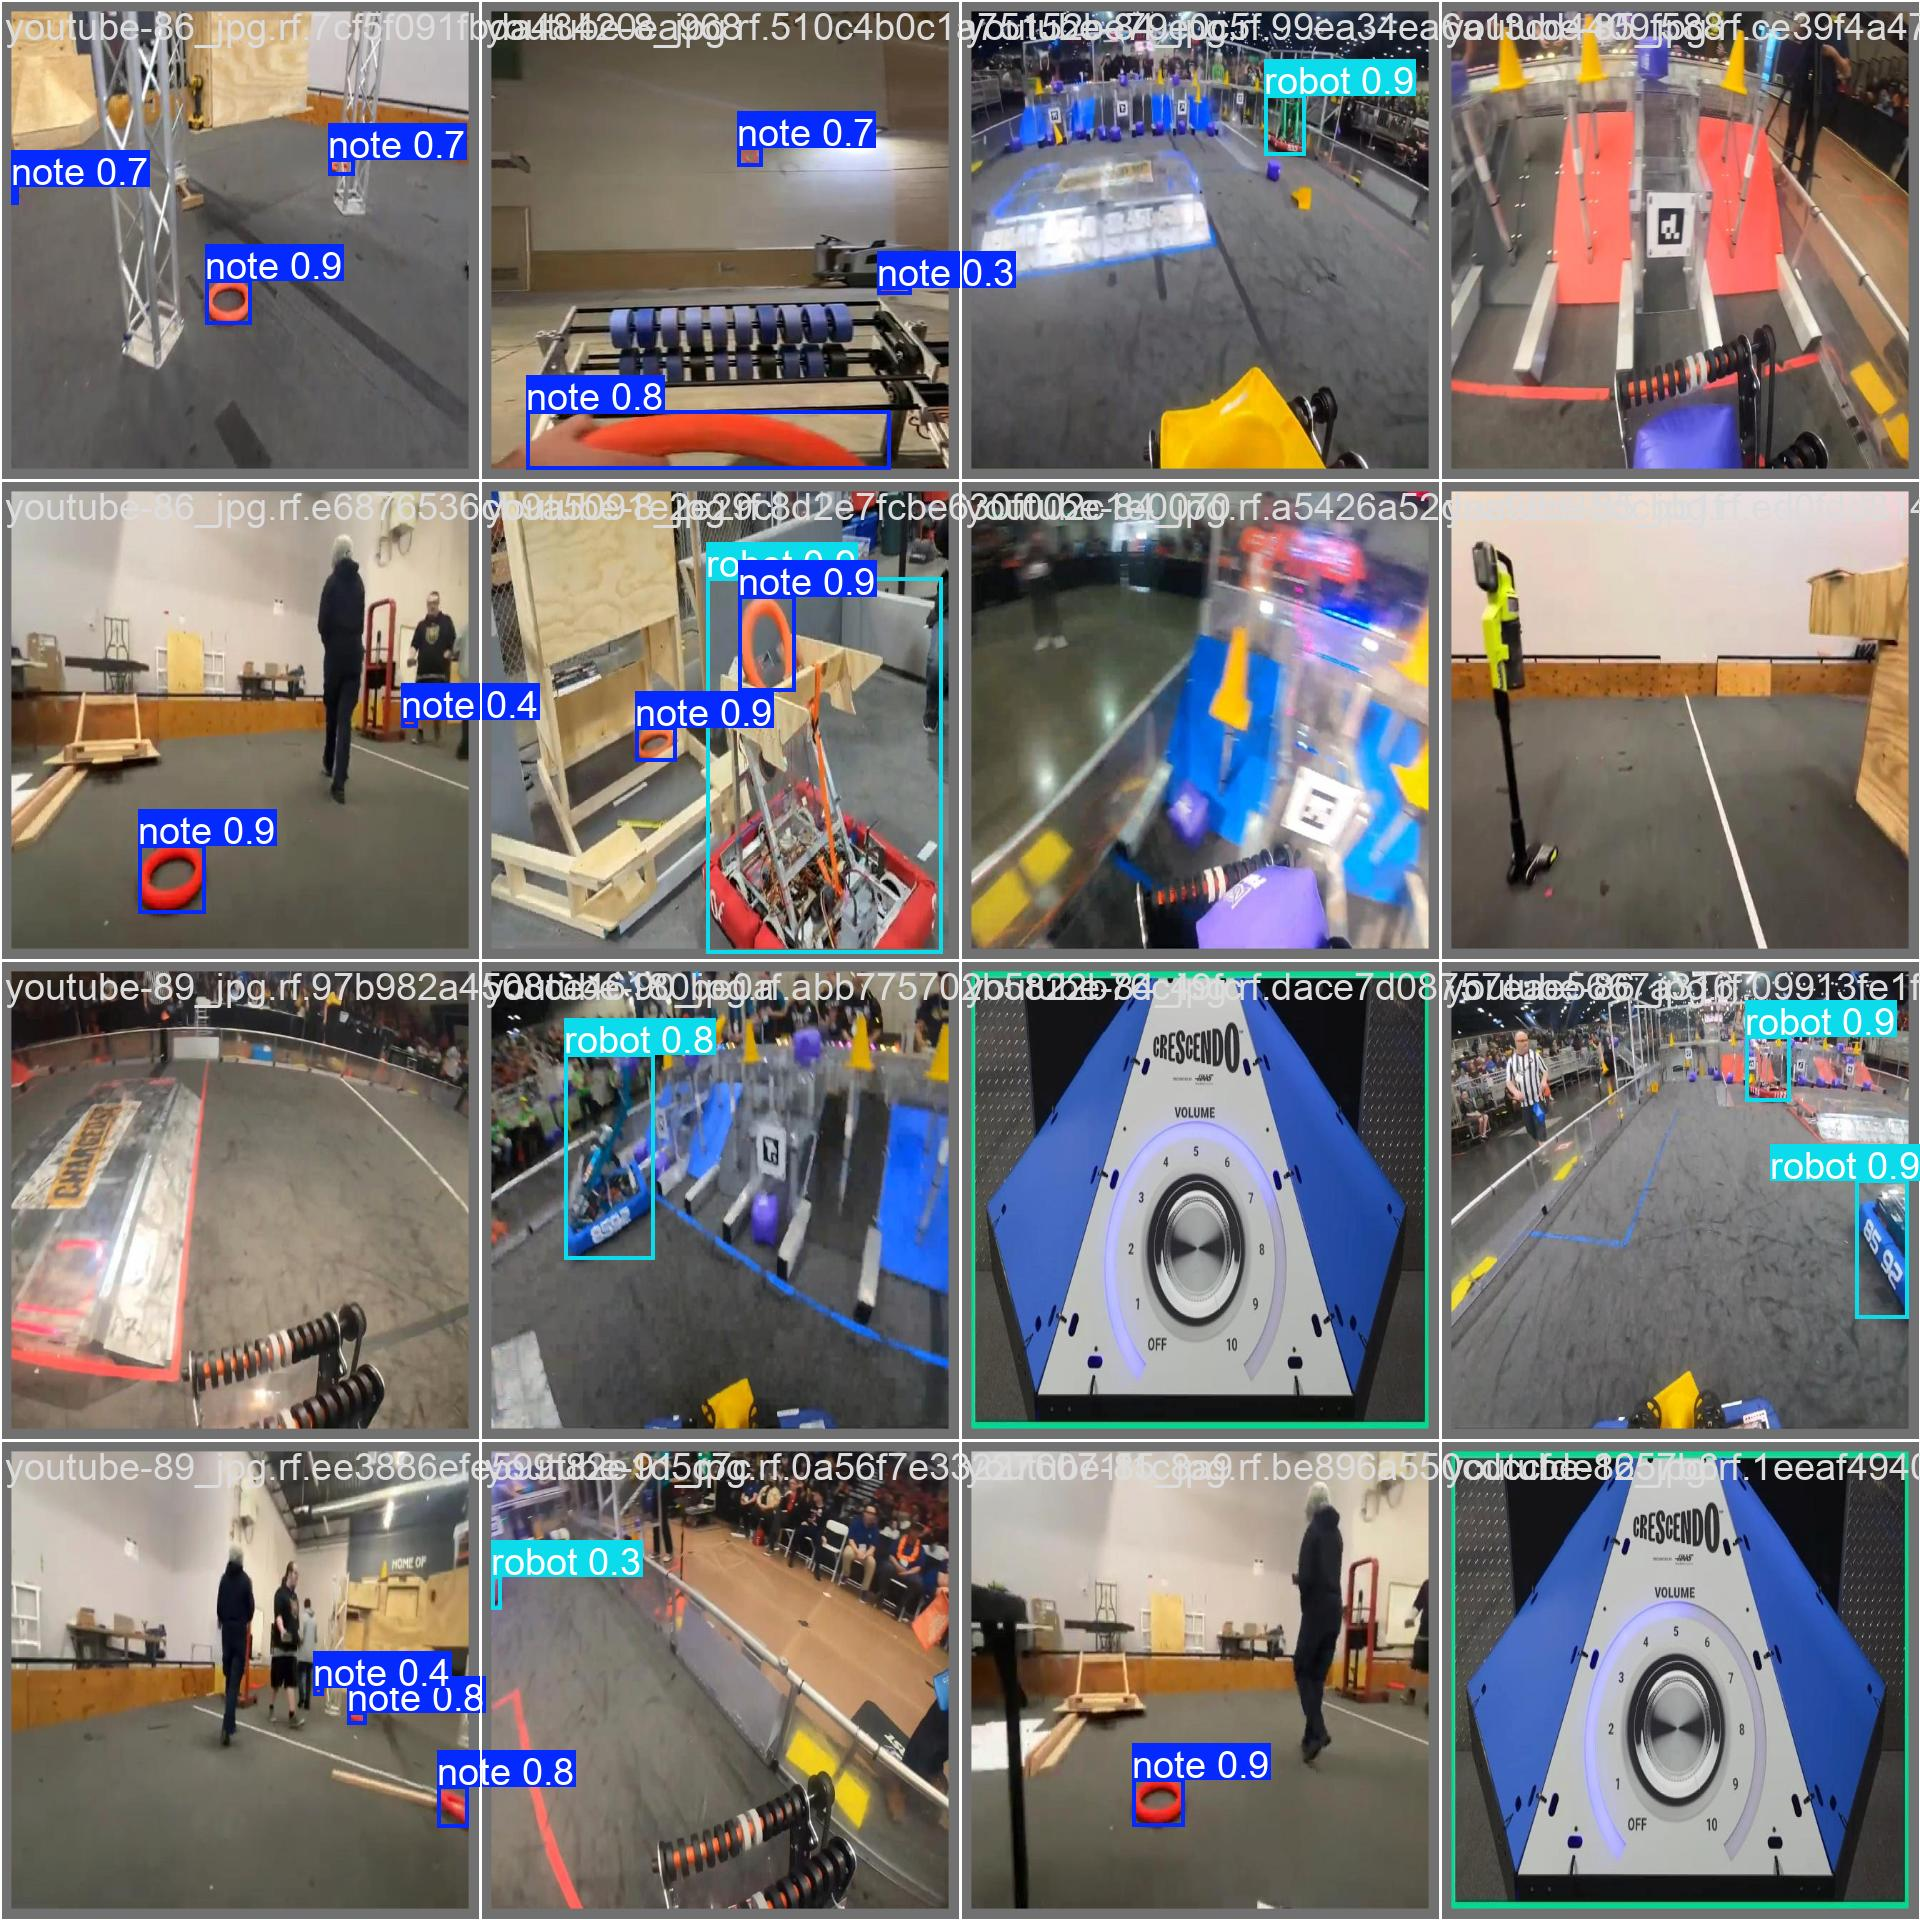

In [13]:
from IPython.display import Image, display
import os
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v15/confusion_matrix.png', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v15/results.png', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v15/train_batch0.jpg', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v15/train_batch0.jpg', width=600))
display(Image(filename=f'{HOME}/robot_detection/runs/train/coral-detection-model-v15/val_batch0_pred.jpg', width=600))